# Deep Learning Project - Traffic Sign Recognition using Convolutional Neural Networks

**Group 2 members:** <br>
Bruno Belo, R20170735 <br>
Rui Monteiro, R20170796 <br>
Tomás Santos, R20170734 <br>

**MSc:** Data Science and Advanced Analytics - Nova IMS <br>
**Course:** Deep Learning <br>
2020/2021

## Introduction
???

## Setup Environment
To run this Notebook without issues, the user can fork and clone our **GitHub repository** available at https://github.com/rfmmonteiro99/DL-Project-Final.

Furthermore, the user needs an Anaconda environment with all the used libraries. A yml file is provided on our GitHub repository (link above) for that purpose. The user can **create the environment** with the ???.yml file, by following these steps:
1. Put the yml file on a folder or even on the Desktop
2. Open Anaconda Navigator
3. Go to "Environments"
4. Click on "Import"
5. Name the new environment on "Name", and find the path to your file on "Specification File" (you may need to specify you want to search for txt files on the "Import Environment" box)
6. Click on "Import" so that Anaconda starts loading all the packages
7. Finally, navigate to the new environment on "Home" and launch Jupyter Notebook

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

## 1. Importing and Exploring Data

In [18]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((32,32)) # Resizing the images to 32x32
            image = np.array(image)
            data.append(image)
            labels.append(i)
            
        except:
            print('Error loading an image')

In [19]:
# Converting lists into Numpy arrays
data = np.array(data)
labels = np.array(labels)

In [20]:
# Check data shape (3 colour channels: Red, Green, Blue)
print(data.shape, labels.shape)

(39209, 32, 32, 3) (39209,)


In [21]:
# Number of classes for this classification problem
unique_signs = np.unique(labels)

len(unique_signs)

43

In [22]:
# Dictionary with the labels of all traffic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

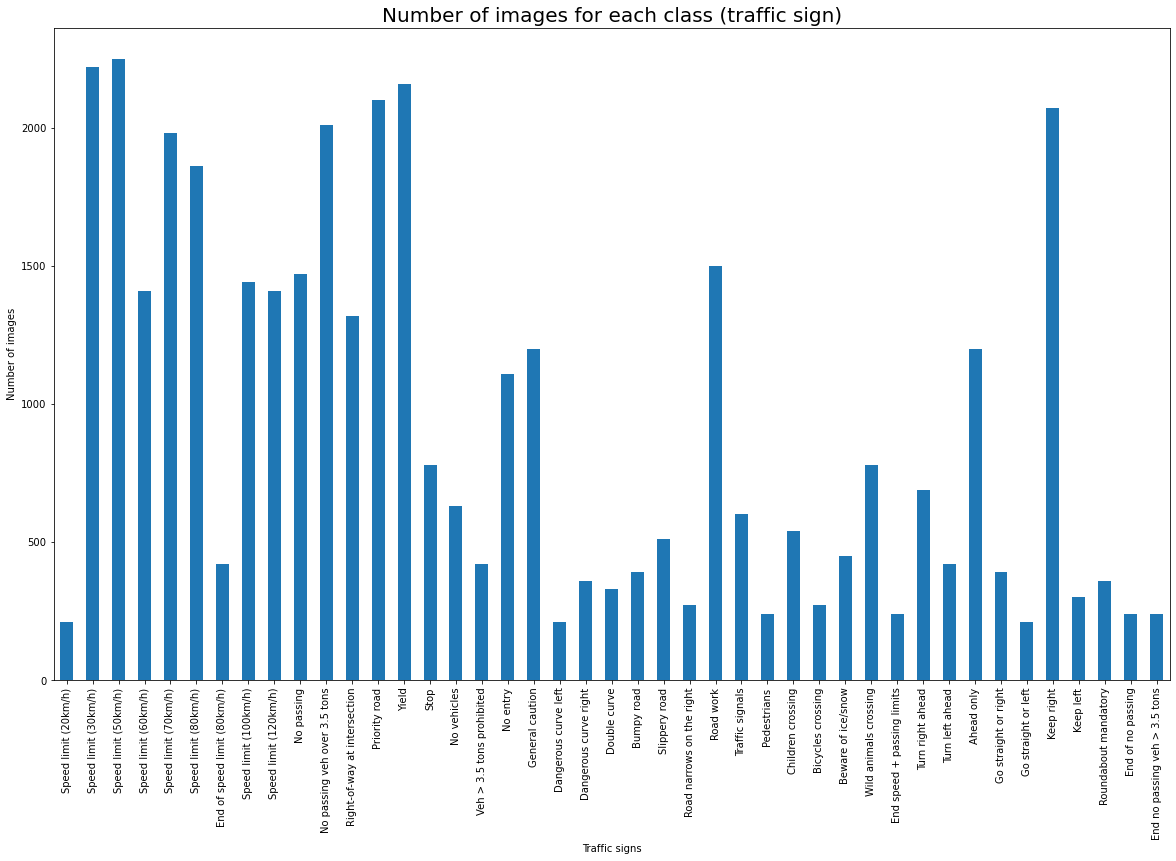

In [25]:
# Getting a list with the classes' names
signs_names = []

for i in range(len(classes)):
    signs_names.append(classes[i])

#graph = pd.DataFrame(np.array([pd.Series(labels).value_counts().sort_index(), signs_names])).T

# Barplot
pd.Series(labels).value_counts().sort_index().plot.bar(figsize=(20, 12)).set_xticklabels(signs_names)

# Labelling the plot and both axes
plt.title('Number of images for each class (traffic sign)', size=20)
plt.xlabel('Traffic signs')
plt.ylabel('Number of images')

plt.show()

In [23]:
def show_20_images(images, labels):
    """
    Displays a plot with 20 random images and their respective classes.
    """
    plt.figure(figsize=(16, 16))
    for i in range(20):
        ax = plt.subplot(5, 5, i+1)
        
        rand = random.randint(1, len(data)-20)
        
        plt.imshow(images[i+rand])
        plt.title(signs_names[labels[i+rand]])
        
        plt.suptitle('Traffic signs examples', size=20)
        plt.axis("off")

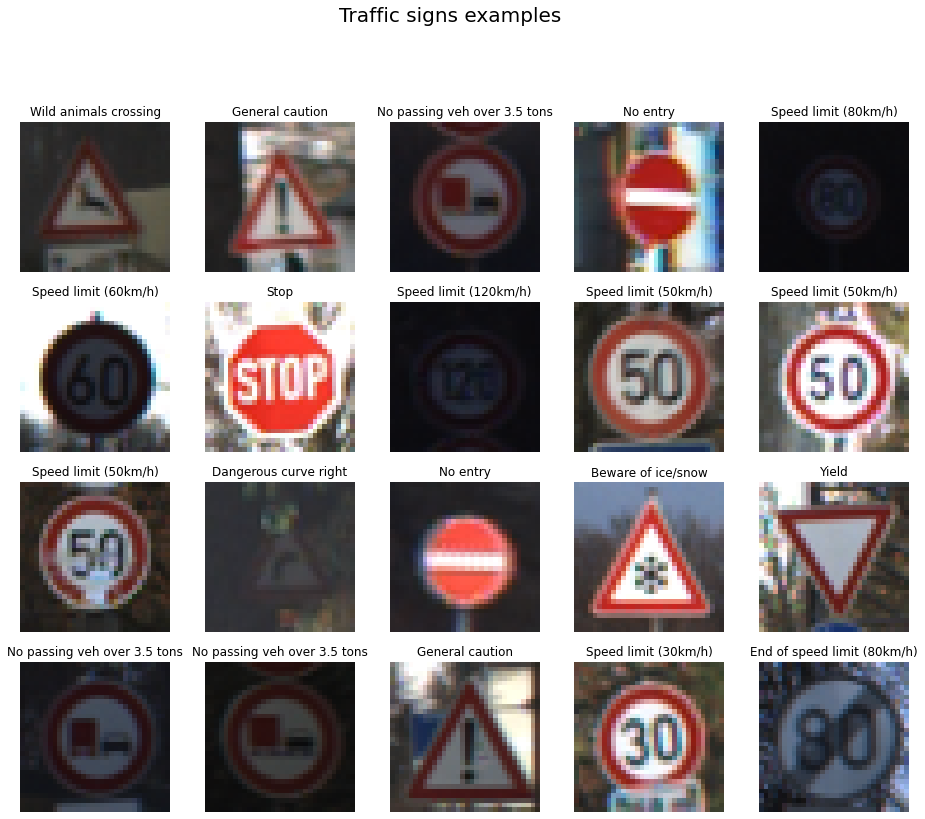

In [26]:
show_20_images(data, labels)

## 2. Data Preprocessing

In [27]:
# All the pixel values on the array are between 0 and 255, so to rescale them to a [0, 1] interval, we can just divide 
# the values by 255
data_normalized = data / 255

## 3. Train-Validation Split

In [28]:
X_train, X_val, y_train, y_val = train_test_split(data_normalized, 
                                                  labels, 
                                                  test_size=0.3, 
                                                  random_state=42, 
                                                  shuffle=True)

In [29]:
print("X_train shape", X_train.shape)
print("X_val shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_val.shape", y_val.shape)

X_train shape (27446, 32, 32, 3)
X_val shape (11763, 32, 32, 3)
y_train.shape (27446,)
y_val.shape (11763,)


## 4. One-Hot Encoding the Labels

In [30]:
# Converting the labels with one-hot encoding
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

## 5. Computer Vision Models

**Our CNN Architectures:**

In [12]:
# Simple CNN
def cnn_1(input_shape):
    classifier = Sequential()
    
    classifier.add(Conv2D(32, (5, 5), input_shape = input_shape, activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    
    classifier.add(Conv2D(64, (5, 5), activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    
    classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    
    classifier.add(Flatten())

    classifier.add(Dense(units = 512, activation = 'relu'))
    classifier.add(Dense(units = 43, activation = 'softmax'))
    
    return classifier

In [14]:
# Similar to cnn_1, but with Dropout
def cnn_2(input_shape):
    classifier = Sequential()
    
    classifier.add(Conv2D(32, (5, 5), input_shape = input_shape, activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    classifier.add(Dropout(rate=0.25))
    
    classifier.add(Conv2D(64, (5, 5), activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    classifier.add(Dropout(rate=0.25))
    
    classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    classifier.add(Dropout(rate=0.25))
    
    classifier.add(Flatten())

    classifier.add(Dense(units = 512, activation = 'relu'))
    classifier.add(Dropout(rate=0.5))
    classifier.add(Dense(units = 43, activation = 'softmax'))
    
    return classifier

In [28]:
# cnn_2, but with BatchNormalization
# https://keras.io/api/layers/normalization_layers/batch_normalization/
# https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/
# Once implemented, batch normalization has the effect of dramatically accelerating the training process of a neural 
# network, and in some cases improves the performance of the model via a modest regularization effect.
def cnn_3(input_shape):
    classifier = Sequential()
    
    classifier.add(Conv2D(32, (5, 5), input_shape = input_shape, activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.25))
    
    classifier.add(Conv2D(64, (5, 5), activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.25))
    
    classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.25))
    
    classifier.add(Flatten())

    classifier.add(Dense(units = 512, activation = 'relu'))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.5))
    classifier.add(Dense(units = 43, activation = 'softmax'))
    
    return classifier

In [12]:
# CNN with this is something possible and commonly used in very challenging tasks.
# The idea of having two (or more) conv layers is to perform a more in-depth analysis of local patterns of the image.
# There is no rule for deciding if two consecutive conv layers are better than a conv layer followed by a pooling layer.
def cnn_4(input_shape):
    classifier = Sequential()
    
    classifier.add(Conv2D(16, (5, 5), input_shape = input_shape, activation = 'relu'))
    classifier.add(Conv2D(32, (5, 5), activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.25))
    
    classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
    classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.25))
    
    classifier.add(Flatten())

    classifier.add(Dense(units = 512, activation = 'relu'))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.5))
    classifier.add(Dense(units = 43, activation = 'softmax'))
    
    return classifier

In [27]:
# cnn_4, but with the same number of filters on the 2 first, and 2 last, conv layers
# also with regularizers
# https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/

# This model takes more time? 1 hour? Say it in the report

from keras.regularizers import l1_l2

l1_cnn_5 = 0.001
l2_cnn_5 = 0.001

def cnn_5(input_shape):
    classifier = Sequential()
    
    classifier.add(Conv2D(32, (5, 5), input_shape = input_shape, activation = 'relu', kernel_regularizer = l1_l2(l1=l1_cnn_5, l2=l2_cnn_5)))
    classifier.add(Conv2D(32, (5, 5), activation = 'relu', kernel_regularizer = l1_l2(l1=l1_cnn_5, l2=l2_cnn_5)))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.25))
    
    classifier.add(Conv2D(64, (3, 3), activation = 'relu', kernel_regularizer = l1_l2(l1=l1_cnn_5, l2=l2_cnn_5)))
    classifier.add(Conv2D(64, (3, 3), activation = 'relu', kernel_regularizer = l1_l2(l1=l1_cnn_5, l2=l2_cnn_5)))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.25))
    
    classifier.add(Flatten())

    classifier.add(Dense(units = 512, activation = 'relu'))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.5))
    classifier.add(Dense(units = 43, activation = 'softmax'))
    
    return classifier

In [13]:
# cnn_3, but with 256 units and 64 batches in the compile
def cnn_6(input_shape):
    classifier = Sequential()
    
    classifier.add(Conv2D(32, (5, 5), input_shape = input_shape, activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.25))
    
    classifier.add(Conv2D(64, (5, 5), activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.25))
    
    classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2, 2)))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.25))
    
    classifier.add(Flatten())

    classifier.add(Dense(units = 256, activation = 'relu'))
    classifier.add(BatchNormalization())
    classifier.add(Dropout(rate=0.5))
    classifier.add(Dense(units = 43, activation = 'softmax'))
    
    return classifier

**Pre-trained Models:**

Three of the best and more popular models for Transfer Learning are as follows:

- VGG (we will use VGG16); <br>
- EfficientNet (we will use EfficientNetB7); <br>
- Residual Network (we will use ResNet152V2).

https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/ <br>
https://keras.io/api/applications/ <br>
https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/ <br>
https://github.com/krishnaik06/Transfer-Learning/blob/master/face_Recognition.py <br>


In this Transfer Learning phase, we will train only the fully-connected layer, so the rest of the model's weights will stay frozen. We added our own custom classifier on the fully-connected layers of the 3 models.

https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce

In [38]:
# VGG16
from keras.applications.vgg16 import VGG16

vgg = VGG16(input_shape=(32,32,3), # It only supports 32x32 and not 30x30
            weights='imagenet', 
            include_top=False)

# Don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
    
# Add a Fully Connected Layer
x = Flatten()(vgg.output)

x = Dense(units = 512, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(rate=0.5)(x)
x = Dense(units = 43, activation='softmax')(x)

In [45]:
# The EfficientNet models are not available in some Keras versions at the moment, only on TensorFlow
from tensorflow.keras.applications.efficientnet import EfficientNetB7

In [46]:
# EfficientNetB7
e_net = EfficientNetB7(input_shape=(32,32,3),
                       weights='imagenet', 
                       include_top=False)

# Don't train existing weights
for layer in e_net.layers:
    layer.trainable = False
    
# Add a Fully Connected Layer
y = Flatten()(e_net.output)

y = Dense(units = 512, activation = 'relu')(y)
y = BatchNormalization()(y)
y = Dropout(rate=0.5)(y)
y = Dense(units = 43, activation='softmax')(y)

258080768/258076736 [==============================] - 21s 0us/step


In [60]:
# ResNet152V2
from keras.applications.resnet_v2 import ResNet152V2

resnet = ResNet152V2(input_shape=(32,32,3), # It only supports 32x32 and not 30x30
                     weights='imagenet', 
                     include_top=False)

# Don't train existing weights
for layer in resnet.layers:
    layer.trainable = False
    
# Add a Fully Connected Layer
z = Flatten()(resnet.output)

z = Dense(units = 512, activation = 'relu')(z)
z = BatchNormalization()(z)
z = Dropout(rate=0.5)(z)
z = Dense(units = 43, activation='softmax')(z)

234553344/234545216 [==============================] - 18s 0us/step


### 5.1. Data Augmentation

In [32]:
from keras.preprocessing.image import ImageDataGenerator

# The rotations and flips can potentially harm the quality of the model (some signs look like others if they are rotated),
# so we will avoid using those parameters
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest')

### 5.2. Callbacks

In [33]:
import keras

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath = 'cnn_model_file',
        monitor='val_loss',
        save_best_only=True)
]

### 5.3. Compile and Fit

In [34]:
from keras import optimizers

**Our CNN Architectures:**

**a) cnn_1:**

In [78]:
# Get the model
cnn_1_model = cnn_1((30,30,3))

# Compile
opt = optimizers.RMSprop(lr = 1e-4) # Try Adam

cnn_1_model.compile(loss='categorical_crossentropy', 
                    optimizer=opt, 
                    metrics=['accuracy'])

# Try 64 batches
epochs = 30

history_1 = cnn_1_model.fit(aug.flow(X_train, y_train, batch_size=32),
                            epochs=epochs, 
                            callbacks=callbacks_list,
                            validation_data=(X_val, y_val))

Epoch 1/30
857/858 [============================>.] - ETA: 0s - loss: 3.2589 - accuracy: 0.1307WARNING:tensorflow:From C:\Users\ruifi\anaconda3\envs\DLclasses\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn_1_model_file\assets
858/858 [==============================] - 56s 66ms/step - loss: 3.2584 - accuracy: 0.1308 - val_loss: 2.8801 - val_accuracy: 0.2307
Epoch 2/30
858/858 [==============================] - 59s 68ms/step - loss: 2.7444 - accuracy: 0.2437 - val_loss: 2.3665 - val_accuracy: 0.3077
Epoch 3/30
858/858 [==============================] - 57s 67ms/step - loss: 2.

In [80]:
# Model summary
cnn_1_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)             

**b) cnn_2:**

In [17]:
# Get the model
cnn_2_model = cnn_2((30,30,3))

# Compile
opt = optimizers.RMSprop(lr = 1e-4) # Try Adam

cnn_2_model.compile(loss='categorical_crossentropy', 
                    optimizer=opt, 
                    metrics=['accuracy'])

# Try 64 batches
epochs = 30

history_2 = cnn_2_model.fit(aug.flow(X_train, y_train, batch_size=32),
                            epochs=epochs, 
                            callbacks=callbacks_list,
                            validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - ETA: 0s - loss: 3.4770 - accuracy: 0.0761WARNING:tensorflow:From C:\Users\ruifi\anaconda3\envs\DLclasses\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn_1_model_file\assets
858/858 [==============================] - 64s 75ms/step - loss: 3.4770 - accuracy: 0.0761 - val_loss: 3.2413 - val_accuracy: 0.1530
Epoch 2/30
858/858 [==============================] - 60s 69ms/step - loss: 3.1162 - accuracy: 0.1479 - val_loss: 2.8273 - val_accuracy: 0.2096
Epoch 3/30
858/858 [==============================] - 60s 70ms/step - loss: 2.

Epoch 27/30
858/858 [==============================] - 62s 72ms/step - loss: 0.5145 - accuracy: 0.8363 - val_loss: 0.1515 - val_accuracy: 0.9678
Epoch 28/30
858/858 [==============================] - 61s 71ms/step - loss: 0.5051 - accuracy: 0.8416 - val_loss: 0.1328 - val_accuracy: 0.9679
Epoch 29/30
858/858 [==============================] - 64s 75ms/step - loss: 0.4792 - accuracy: 0.8473 - val_loss: 0.1325 - val_accuracy: 0.9711
Epoch 30/30
858/858 [==============================] - 59s 69ms/step - loss: 0.4563 - accuracy: 0.8533 - val_loss: 0.1154 - val_accuracy: 0.9731


In [18]:
# Model summary
cnn_2_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         7

**c) cnn_3:**

In [30]:
# Get the model
cnn_3_model = cnn_3((30,30,3))

# Compile
opt = optimizers.Adam() # https://keras.io/api/optimizers/adam/

cnn_3_model.compile(loss='categorical_crossentropy', 
                    optimizer=opt, 
                    metrics=['accuracy'])

# Try 64 batches
epochs = 30

history_3 = cnn_3_model.fit(aug.flow(X_train, y_train, batch_size=32),
                            epochs=epochs, 
                            callbacks=callbacks_list,
                            validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 71s 82ms/step - loss: 2.7471 - accuracy: 0.2974 - val_loss: 1.0745 - val_accuracy: 0.6495
Epoch 2/30
858/858 [==============================] - 69s 81ms/step - loss: 1.2737 - accuracy: 0.6033 - val_loss: 0.3389 - val_accuracy: 0.8888
Epoch 3/30
858/858 [==============================] - 72s 84ms/step - loss: 0.8648 - accuracy: 0.7283 - val_loss: 0.1953 - val_accuracy: 0.9392
Epoch 4/30
858/858 [==============================] - 70s 81ms/step - loss: 0.6844 - accuracy: 0.7854 - val_loss: 0.1762 - val_accuracy: 0.9424
Epoch 5/30
858/858 [==============================] - 62s 73ms/step - loss: 0.5940 - accuracy: 0.8139 - val_loss: 0.1773 - val_accuracy: 0.9465
Epoch 6/30
858/858 [==============================] - 70s 81ms/step - loss: 0.5257 - accuracy: 0.8358 - val_loss: 0.0665 - val_accuracy: 0.9812
Epoch 7/30
858/858 [==============================] - 63s 74ms/step - loss: 0.4815 - accuracy: 0.8488 - val_loss: 0.1078 - val_accuracy:

In [31]:
# Model summary
cnn_3_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 64)         

**d) cnn_4:**

In [16]:
# Get the model
cnn_4_model = cnn_4((30,30,3))

# Compile
opt = optimizers.Adam() # https://keras.io/api/optimizers/adam/

cnn_4_model.compile(loss='categorical_crossentropy', 
                    optimizer=opt, 
                    metrics=['accuracy'])

# Try 64 batches
epochs = 30

history_4 = cnn_4_model.fit(aug.flow(X_train, y_train, batch_size=32),
                            epochs=epochs, 
                            callbacks=callbacks_list,
                            validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - ETA: 0s - loss: 2.2985 - accuracy: 0.4009WARNING:tensorflow:From C:\Users\ruifi\anaconda3\envs\DLclasses\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn_model_file\assets
858/858 [==============================] - 117s 137ms/step - loss: 2.2985 - accuracy: 0.4009 - val_loss: 0.7668 - val_accuracy: 0.7225
Epoch 2/30
858/858 [==============================] - 112s 131ms/step - loss: 0.8124 - accuracy: 0.7505 - val_loss: 0.1461 - val_accuracy: 0.9515
Epoch 3/30
858/858 [==============================] - 107s 124ms/step - loss

In [17]:
# Model summary
cnn_4_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        12832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 11, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         7

**e) cnn_5:**

In [28]:
# Get the model
cnn_5_model = cnn_5((30,30,3))

# Compile
opt = optimizers.Adam() # https://keras.io/api/optimizers/adam/

cnn_5_model.compile(loss='categorical_crossentropy', 
                    optimizer=opt, 
                    metrics=['accuracy'])

# Try 64 batches
epochs = 30

history_5 = cnn_5_model.fit(aug.flow(X_train, y_train, batch_size=32),
                            epochs=epochs, 
                            callbacks=callbacks_list,
                            validation_data=(X_val, y_val))

Epoch 1/30
858/858 [==============================] - 127s 148ms/step - loss: 4.4741 - accuracy: 0.2915 - val_loss: 2.1793 - val_accuracy: 0.6535
Epoch 2/30
858/858 [==============================] - 117s 136ms/step - loss: 2.0256 - accuracy: 0.6439 - val_loss: 1.3251 - val_accuracy: 0.8137
Epoch 3/30
858/858 [==============================] - 114s 133ms/step - loss: 1.4231 - accuracy: 0.7684 - val_loss: 0.8713 - val_accuracy: 0.9338
Epoch 4/30
858/858 [==============================] - 123s 144ms/step - loss: 1.2060 - accuracy: 0.8155 - val_loss: 0.7883 - val_accuracy: 0.9370
Epoch 5/30
858/858 [==============================] - 118s 137ms/step - loss: 1.0841 - accuracy: 0.8429 - val_loss: 0.7113 - val_accuracy: 0.9550
Epoch 6/30
858/858 [==============================] - 122s 143ms/step - loss: 1.0273 - accuracy: 0.8580 - val_loss: 0.6833 - val_accuracy: 0.9573
Epoch 7/30
858/858 [==============================] - 110s 128ms/step - loss: 0.9868 - accuracy: 0.8686 - val_loss: 0.7221 -

In [29]:
# Model summary
cnn_5_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)         

**f) cnn_6:**

In [17]:
# Get the model
cnn_6_model = cnn_6((30,30,3))

# Compile
opt = optimizers.Adam() # https://keras.io/api/optimizers/adam/

cnn_6_model.compile(loss='categorical_crossentropy', 
                    optimizer=opt, 
                    metrics=['accuracy'])

# 64 batches!!!
epochs = 30

history_6 = cnn_6_model.fit(aug.flow(X_train, y_train, batch_size=64),
                            epochs=epochs, 
                            callbacks=callbacks_list,
                            validation_data=(X_val, y_val))

Epoch 1/30
429/429 [==============================] - ETA: 0s - loss: 2.7930 - accuracy: 0.2781WARNING:tensorflow:From C:\Users\ruifi\anaconda3\envs\DLclasses\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn_model_file\assets
429/429 [==============================] - 71s 166ms/step - loss: 2.7930 - accuracy: 0.2781 - val_loss: 2.3155 - val_accuracy: 0.3438
Epoch 2/30
429/429 [==============================] - 70s 164ms/step - loss: 1.3675 - accuracy: 0.5719 - val_loss: 0.5459 - val_accuracy: 0.8357
Epoch 3/30
429/429 [==============================] - 64s 150ms/step - loss: 0

In [18]:
# Model summary
cnn_6_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 64)          2

**Pre-trained Models:**

**a) VGG16:**

In [39]:
# Get the model
from keras.models import Model
vgg_model = Model(inputs=vgg.input, outputs=x)

# Compile
opt = optimizers.Adam() # https://keras.io/api/optimizers/adam/

vgg_model.compile(loss='categorical_crossentropy', 
                  optimizer=opt, 
                  metrics=['accuracy'])

# Fit
epochs = 5 # Less epochs, bc only the fully connected layer will be trained

history_vgg = vgg_model.fit(aug.flow(X_train, y_train, batch_size=32),
                            epochs=epochs, 
                            callbacks=callbacks_list,
                            validation_data=(X_val, y_val))

Epoch 1/5
858/858 [==============================] - 232s 270ms/step - loss: 2.0923 - accuracy: 0.3975 - val_loss: 1.4338 - val_accuracy: 0.5494
Epoch 2/5
858/858 [==============================] - 235s 274ms/step - loss: 1.6027 - accuracy: 0.5011 - val_loss: 1.2840 - val_accuracy: 0.5777
Epoch 3/5
858/858 [==============================] - 235s 274ms/step - loss: 1.4870 - accuracy: 0.5287 - val_loss: 1.2267 - val_accuracy: 0.6054
Epoch 4/5
858/858 [==============================] - 231s 270ms/step - loss: 1.4239 - accuracy: 0.5448 - val_loss: 1.1465 - val_accuracy: 0.6194
Epoch 5/5
858/858 [==============================] - 230s 268ms/step - loss: 1.3796 - accuracy: 0.5597 - val_loss: 1.1428 - val_accuracy: 0.6295


**b) EfficientNetB7:**

In [47]:
# Get the model
e_net_model = Model(inputs=e_net.input, outputs=y)

# Compile
opt = optimizers.Adam() # https://keras.io/api/optimizers/adam/

e_net_model.compile(loss='categorical_crossentropy', 
                    optimizer=opt, 
                    metrics=['accuracy'])

# Fit
epochs = 5 # Less epochs, bc only the fully connected layer will be trained

history_e_net = e_net_model.fit(aug.flow(X_train, y_train, batch_size=32),
                                epochs=epochs, 
                                callbacks=callbacks_list,
                                validation_data=(X_val, y_val))

Epoch 1/5
858/858 [==============================] - 402s 468ms/step - loss: 3.7821 - accuracy: 0.0486 - val_loss: 3.5191 - val_accuracy: 0.0583
Epoch 2/5
858/858 [==============================] - 405s 472ms/step - loss: 3.6357 - accuracy: 0.0508 - val_loss: 3.5123 - val_accuracy: 0.0526
Epoch 3/5
858/858 [==============================] - 398s 464ms/step - loss: 3.5746 - accuracy: 0.0519 - val_loss: 3.4952 - val_accuracy: 0.0583
Epoch 4/5
858/858 [==============================] - 397s 463ms/step - loss: 3.5477 - accuracy: 0.0532 - val_loss: 3.5021 - val_accuracy: 0.0556
Epoch 5/5
858/858 [==============================] - 392s 457ms/step - loss: 3.5410 - accuracy: 0.0527 - val_loss: 3.5030 - val_accuracy: 0.0527


**c) ResNet152V2:**

In [61]:
# Get the model
resnet_model = Model(inputs=resnet.input, outputs=z)

# Compile
opt = optimizers.Adam() # https://keras.io/api/optimizers/adam/

resnet_model.compile(loss='categorical_crossentropy', 
                     optimizer=opt, 
                     metrics=['accuracy'])

# Fit
epochs = 5 # Less epochs, bc only the fully connected layer will be trained

history_resnet = resnet_model.fit(aug.flow(X_train, y_train, batch_size=32),
                                  epochs=epochs, 
                                  callbacks=callbacks_list,
                                  validation_data=(X_val, y_val))

Epoch 1/5
858/858 [==============================] - 293s 341ms/step - loss: 2.8675 - accuracy: 0.2502 - val_loss: 2.0493 - val_accuracy: 0.3840
Epoch 2/5
858/858 [==============================] - 287s 334ms/step - loss: 2.3089 - accuracy: 0.3271 - val_loss: 1.9001 - val_accuracy: 0.4210
Epoch 3/5
858/858 [==============================] - 290s 338ms/step - loss: 2.1644 - accuracy: 0.3503 - val_loss: 1.8266 - val_accuracy: 0.4343
Epoch 4/5
858/858 [==============================] - 286s 334ms/step - loss: 2.0789 - accuracy: 0.3693 - val_loss: 1.7675 - val_accuracy: 0.4561
Epoch 5/5
858/858 [==============================] - 288s 336ms/step - loss: 2.0290 - accuracy: 0.3832 - val_loss: 1.7517 - val_accuracy: 0.4534


As it can be seen by the three previous outputs, the pre-trained models had very weak performances in general, and specifically in the validation accuracy. Thus, we will perform the predictions on the test dataset using one of our CNN architectures, so we won't be showing any more metrics for these three transfer learning models (i.e. VGG16, EfficientNetB7, and ResNet152V2) in the next sections of this Notebook.

## 6. Evaluating the Model

**Our CNN Architectures:**

**a) cnn_1:**

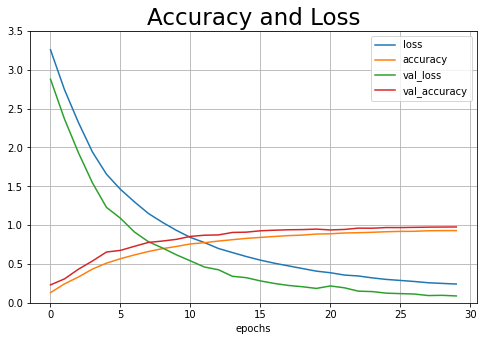

In [84]:
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3.5)

plt.title('Accuracy and Loss', size=23)
plt.xlabel('epochs')

plt.show()

**b) cnn_2:**

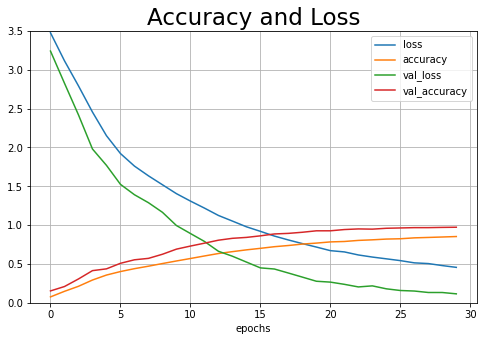

In [19]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3.5)

plt.title('Accuracy and Loss', size=23)
plt.xlabel('epochs')

plt.show()

**c) cnn_3:**

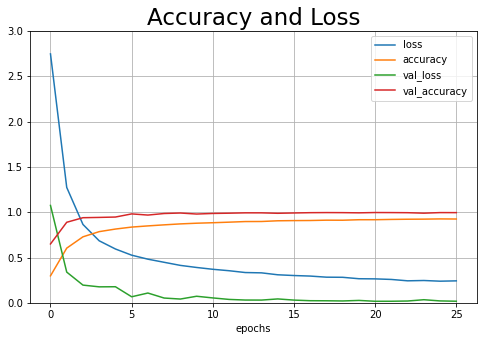

In [33]:
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3)

plt.title('Accuracy and Loss', size=23)
plt.xlabel('epochs')

plt.show()

**d) cnn_4:**

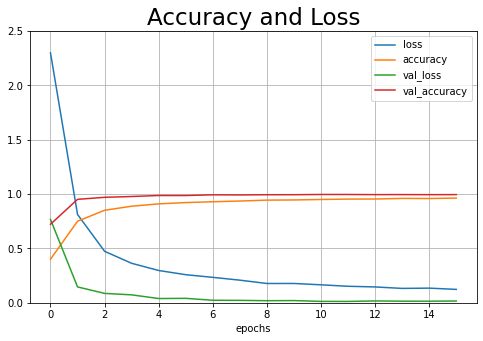

In [19]:
pd.DataFrame(history_4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2.5)

plt.title('Accuracy and Loss', size=23)
plt.xlabel('epochs')

plt.show()

**e) cnn_5:**

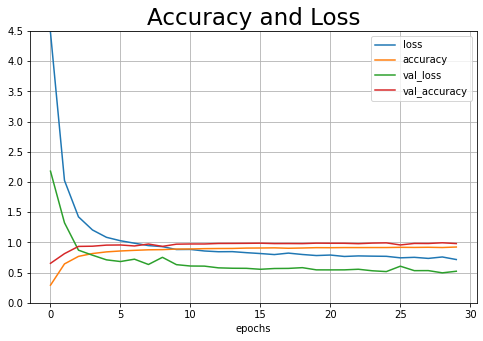

In [34]:
pd.DataFrame(history_5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 4.5)

plt.title('Accuracy and Loss', size=23)
plt.xlabel('epochs')

plt.show()

**f) cnn_6:**

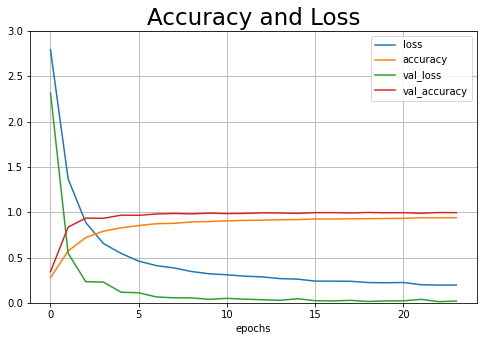

In [20]:
pd.DataFrame(history_6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3)

plt.title('Accuracy and Loss', size=23)
plt.xlabel('epochs')

plt.show()

## 7. Importing the Test dataset

In [21]:
y_test = pd.read_csv('Test.csv')
labels_test = y_test["ClassId"].values
imgs = y_test["Path"].values
data_test = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data_test.append(np.array(image))
    
X_test = np.array(data_test)

In [22]:
# Check data shape (3 colour channels: Red, Green, Blue)
print(X_test.shape, labels_test.shape)

(12630, 30, 30, 3) (12630,)


In [23]:
# Normalization
X_test = X_test / 255

## 8. Making Predictions and Evaluating the measures

In [24]:
from sklearn.metrics import accuracy_score, classification_report

**a) cnn_1:**

In [94]:
# Prediction with the first CNN (cnn_1_model)
pred_1 = cnn_1_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [95]:
print('Test Dataset accuracy:', round(accuracy_score(labels_test, pred_1)*100, 2))

Test Dataset accuracy: 91.03


In [96]:
print(classification_report(labels_test, pred_1))

              precision    recall  f1-score   support

           0       0.88      0.63      0.74        60
           1       0.88      0.99      0.93       720
           2       0.84      0.96      0.89       750
           3       0.93      0.88      0.90       450
           4       0.98      0.89      0.93       660
           5       0.84      0.81      0.83       630
           6       0.97      0.96      0.97       150
           7       0.93      0.90      0.92       450
           8       0.94      0.93      0.94       450
           9       0.97      0.89      0.93       480
          10       0.94      0.98      0.96       660
          11       0.90      0.93      0.91       420
          12       1.00      0.90      0.94       690
          13       0.99      0.99      0.99       720
          14       0.90      0.99      0.94       270
          15       1.00      0.99      0.99       210
          16       0.91      1.00      0.95       150
          17       0.99    

**b) cnn_2:**

In [24]:
# Prediction with the second CNN (cnn_2_model)
pred_2 = cnn_2_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
print('Test Dataset accuracy:', round(accuracy_score(labels_test, pred_2)*100, 2))

Test Dataset accuracy: 93.8


In [26]:
print(classification_report(labels_test, pred_2))

              precision    recall  f1-score   support

           0       1.00      0.62      0.76        60
           1       0.87      1.00      0.93       720
           2       0.98      0.95      0.96       750
           3       0.98      0.92      0.95       450
           4       0.99      0.95      0.97       660
           5       0.94      0.92      0.93       630
           6       0.92      0.99      0.96       150
           7       0.93      0.94      0.94       450
           8       0.94      0.96      0.95       450
           9       1.00      1.00      1.00       480
          10       0.99      1.00      0.99       660
          11       0.93      0.93      0.93       420
          12       1.00      0.93      0.97       690
          13       0.97      1.00      0.98       720
          14       1.00      1.00      1.00       270
          15       0.94      0.99      0.96       210
          16       0.94      1.00      0.97       150
          17       1.00    

**c) cnn_3:**

In [35]:
# Prediction with the third CNN (cnn_3_model)
pred_3 = cnn_3_model.predict_classes(X_test)

In [36]:
print('Test Dataset accuracy:', round(accuracy_score(labels_test, pred_3)*100, 2))

Test Dataset accuracy: 96.58


In [37]:
print(classification_report(labels_test, pred_3))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        60
           1       0.92      1.00      0.96       720
           2       0.96      0.94      0.95       750
           3       0.99      0.94      0.96       450
           4       1.00      0.97      0.98       660
           5       0.96      0.93      0.95       630
           6       0.97      0.99      0.98       150
           7       1.00      0.95      0.97       450
           8       0.92      1.00      0.96       450
           9       0.98      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       0.99      0.97      0.98       420
          12       1.00      0.88      0.94       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.95      1.00      0.97       210
          16       0.99      1.00      1.00       150
          17       1.00    

**d) cnn_4:**

In [24]:
# Prediction with the fourth CNN (cnn_4_model)
pred_4 = cnn_4_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
print('Test Dataset accuracy:', round(accuracy_score(labels_test, pred_4)*100, 2))

Test Dataset accuracy: 95.96


In [26]:
print(classification_report(labels_test, pred_4))

              precision    recall  f1-score   support

           0       0.67      1.00      0.81        60
           1       0.99      1.00      0.99       720
           2       0.95      0.99      0.97       750
           3       0.98      0.97      0.98       450
           4       0.99      0.98      0.99       660
           5       0.95      0.93      0.94       630
           6       1.00      0.95      0.97       150
           7       1.00      0.92      0.96       450
           8       0.95      0.99      0.97       450
           9       0.99      1.00      0.99       480
          10       0.98      1.00      0.99       660
          11       0.92      0.94      0.93       420
          12       1.00      0.91      0.95       690
          13       1.00      1.00      1.00       720
          14       0.95      1.00      0.98       270
          15       0.92      0.99      0.95       210
          16       1.00      1.00      1.00       150
          17       1.00    

**e) cnn_5:**

In [35]:
# Prediction with the fifth CNN (cnn_5_model)
pred_5 = cnn_5_model.predict_classes(X_test)

In [36]:
print('Test Dataset accuracy:', round(accuracy_score(labels_test, pred_5)*100, 2))

Test Dataset accuracy: 93.18


In [37]:
print(classification_report(labels_test, pred_5))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        60
           1       0.87      1.00      0.93       720
           2       0.96      0.98      0.97       750
           3       0.96      0.99      0.98       450
           4       0.99      0.97      0.98       660
           5       0.99      0.80      0.88       630
           6       0.99      0.99      0.99       150
           7       1.00      0.96      0.98       450
           8       0.98      0.98      0.98       450
           9       0.96      1.00      0.98       480
          10       1.00      0.95      0.97       660
          11       0.94      0.90      0.92       420
          12       1.00      0.88      0.94       690
          13       1.00      0.98      0.99       720
          14       0.99      1.00      0.99       270
          15       0.94      0.98      0.96       210
          16       0.94      1.00      0.97       150
          17       1.00    

**f) cnn_6:**

In [25]:
# Prediction with the sixth CNN (cnn_6_model)
pred_6 = cnn_6_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [26]:
print('Test Dataset accuracy:', round(accuracy_score(labels_test, pred_6)*100, 2))

Test Dataset accuracy: 95.81


In [27]:
print(classification_report(labels_test, pred_6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      0.99      0.99       720
           2       0.92      0.99      0.95       750
           3       0.98      0.99      0.99       450
           4       0.98      0.96      0.97       660
           5       0.97      0.92      0.94       630
           6       1.00      0.89      0.94       150
           7       1.00      0.92      0.96       450
           8       0.94      0.97      0.95       450
           9       0.99      1.00      0.99       480
          10       1.00      0.99      1.00       660
          11       0.98      0.91      0.95       420
          12       0.99      0.91      0.95       690
          13       1.00      1.00      1.00       720
          14       0.97      1.00      0.99       270
          15       0.99      0.98      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

## Save the Best CNN Model

In [ ]:
cnn_3_model.save('traffic_signs_classifier.h5')

## Code References

A: <br>


B: <br>


C: <br>


D: <br>

